In [ ]:
import pandas as pd
import random

In [ ]:
Dep = pd.DataFrame(pd.read_csv('3yrDEP.csv'))
Dep.drop('Unnamed: 0', axis =1, inplace = True)
Indep = pd.DataFrame(pd.read_csv('IndependentMatrix.csv'))
Indep.drop('Unnamed: 0', axis = 1, inplace = True)
df = pd.merge(Indep, Dep, on='business_id')
df.drop('0', axis = 1, inplace = True)


In [ ]:
df.head()
df.shape

In [ ]:
duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
for x in range(df.shape[1]):
    # Select column at xth index.
    col = df.iloc[:, x]
    # Iterate over all the columns in DataFrame from (x+1)th index till end
    for y in range(x + 1, df.shape[1]):
        # Select column at yth index.
        otherCol = df.iloc[:, y]
        # Check if two columns at x 7 y index are equal
        if col.equals(otherCol):
            duplicateColumnNames.add(df.columns.values[y])

list(duplicateColumnNames)

In [ ]:
df = df.drop(columns=duplicateColumnNames)
df.shape
df.to_csv('dataToUseInModel2.csv')

In [ ]:
# assigns inputs and outputs
X = df[df.columns[3:271]]
y = df['3']

In [ ]:
# linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
dfA = df
dfA['predicted'] = model.predict(X)

In [ ]:
#plot
# !pip install matplotlib
import matplotlib.pyplot as plt
dfA[['3', 'predicted']].plot(alpha=0.7)

In [ ]:
# check params
params = pd.Series(model.coef_, index=X.columns)
params

In [ ]:
# computes r2
from sklearn.metrics import r2_score
r2 = r2_score(dfA['3'], dfA['predicted'])
r2

In [ ]:
adjR2 = 1-(1-r2)*(len(dfA)-1)/(len(dfA)-len(dfA.columns)-1)
adjR2

In [ ]:
Zips = []
for x in df['postal_code']:
    if x not in Zips:
        Zips.append(x)

In [ ]:
ziptoCTY = pd.DataFrame(pd.read_csv('ziptoCounty.csv'))
ziptoCTY.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
def topXparams(ser, x):
    analyze = pd.DataFrame(ser)
    topnumbers = x
    counter = 0
    values = [99999]
    labels = []
    while counter < topnumbers:
        ascend = 0
        templab = ''
        for y in analyze.index:
            test = analyze.loc[y,analyze.columns[0]]
            if abs(test) > abs(ascend) and abs(test) < abs(values[-1]):
                ascend = test
                templab = y
        values.append(ascend)
        labels.append(templab)
        counter += 1
    values = values[1:]
    dictionary = dict(zip(labels, values))
    return dictionary

In [ ]:
def regressZip(zipcode, numParams):
    spec = pd.DataFrame(dfraw[dfraw['postal_code'] == zipcode])
    spec.drop(spec.columns[89:177], axis = 1, inplace = True) #drop all zipcode constant data
    spec.drop(spec.columns[165:181], axis = 1, inplace = True)
    xNew = spec[spec.columns[3:-1]]
    yNew = spec['3']
    model = LinearRegression()
    model.fit(xNew, yNew)
    spec['predicted'] = model.predict(xNew)
    r2 = r2_score(spec['3'], spec['predicted'])
    print('Zipcode: ' + str(zipcode))
    
    sub = ziptoCTY[ziptoCTY['zip'] == zipcode]
    print('STATE: ' + sub.loc[sub.index[0],'STNAME'])
    print('COUNTY: ' + sub.loc[sub.index[0],'CTYNAME'])
    
    print('Number of Restaurants: ' + str(len(spec)))
    print('r2 = ' + str(r2))
    ser = pd.Series(model.coef_, index=xNew.columns)
    print(topXparams(ser, numParams))
    spec[['3', 'predicted']].plot(alpha=0.8)

In [ ]:
Dep = pd.DataFrame(pd.read_csv('3yrDEP.csv'))
Dep.drop('Unnamed: 0', axis =1, inplace = True)
Indep = pd.DataFrame(pd.read_csv('IndependentMatrix.csv'))
Indep.drop('Unnamed: 0', axis = 1, inplace = True)
dfraw = pd.merge(Indep, Dep, on='business_id')
dfraw.drop('0', axis = 1, inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xNew, yNew, test_size = 0.2)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
y_train

In [ ]:
!python -m pip install keras==2.1.5

In [1]:
import tensorflow as tf

In [ ]:
X_train.shape

In [ ]:
model.layers

In [ ]:
X_train.shape

In [ ]:
modelFinal = tf.keras.Sequential()
modelFinal.add(tf.keras.layers.Dense(100, input_shape=(268,),activation='softmax'))
modelFinal.add(tf.keras.layers.Dense(1, input_shape=(100,),activation='tanh'))
mse = tf.keras.losses.mean_squared_error
modelFinal.compile(loss=mse, optimizer = tf.keras.optimizers.SGD())
modelFinal.fit(X_train.values, y_train.values, epochs=10, batch_size=6000, verbose=2, validation_data=(X_test.values, y_test.values))

In [ ]:
y_pred_labels = modelFinal.predict_proba(X_test)
print(y_pred_labels)

In [ ]:
pred = y_pred_labels.flatten()

In [ ]:
import sklearn as sk

In [ ]:
sk.metrics.mean_squared_error(pred,y_test)

In [ ]:
import matplotlib.pyplot as plt

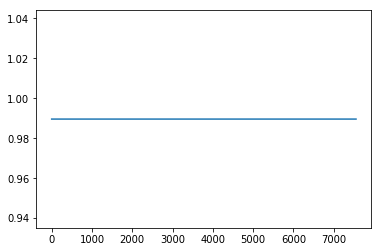

In [ ]:
plt.plot(pred)